#***PRML LAB 3 & 4*** </br>
### Anushka Dadhich
###B22CS097

#Question 1 </br>



##Task 1 </br>


In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math

from sklearn.tree import DecisionTreeClassifier

In [4]:
#set theme
sns.set_style("darkgrid")
#ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data
data = pd.read_csv("/gdrive/MyDrive/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#check for missing values
print("Percentage of missing values:")
print(((data.isna().sum())/data.shape[0])*100)

Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [ ]:
print(round(data.groupby(['Sex','Pclass'])['Age'].agg(['mean']),0))

               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [ ]:
data['Age']=data['Age'].fillna(-1)

for index in range(data.shape[0]):
  if data['Age'][index] == -1:
    if((data['Sex'][index] == 'female') and (data['Pclass'][index])) == 1:
      data['Age'][index] = 31
    elif((data['Sex'][index] == 'female') and (data['Pclass'][index])) == 2:
      data['Age'][index] = 28
    elif((data['Sex'][index] == 'female') and (data['Pclass'][index])) == 3:
      data['Age'][index] = 15
    elif((data['Sex'][index] == 'male') and (data['Pclass'][index])) == 1:
      data['Age'][index] = 34
    elif((data['Sex'][index] == 'male') and (data['Pclass'][index])) == 2:
      data['Age'][index] = 28
    elif((data['Sex'][index] == 'male') and (data['Pclass'][index])) == 3:
      data['Age'][index] = 19

no = ((data['Age'].isna().sum())/data.shape[0])*100
print('% of empty data in Age is:',no)

% of empty data in Age is: 0.0


In [ ]:
data = data.drop(columns = ["Cabin"])
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
data.dropna(inplace = True)
print(((data.isna().sum())/data.shape[0])*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


In [ ]:
#all features
print("All features in titanic dataset:\n", data.columns)
data.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)
#checking
print("Req features in titanic dataset:\n", data.columns)

All features in titanic dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Req features in titanic dataset:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


<Axes: xlabel='Survived', ylabel='Fare'>

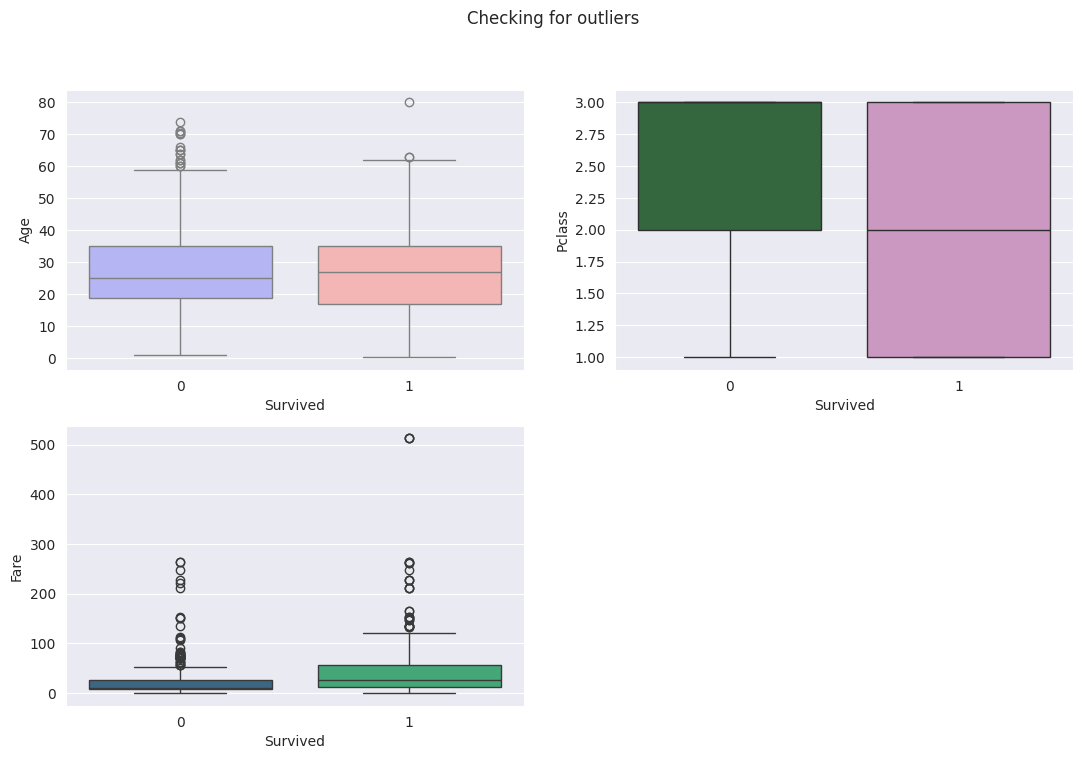

In [ ]:
#CHECK FOR OUTLIERS
figure, axes = plt.subplots(2,2, figsize = (13,8))
figure.suptitle("Checking for outliers")
figure.delaxes(axes[1][1])
sns.boxplot(ax = axes[0,0],data = data, x = 'Survived', y = 'Age',palette = 'bwr')
sns.boxplot(ax = axes[0,1],data = data, x = 'Survived', y = 'Pclass',palette = 'cubehelix')
sns.boxplot(ax = axes[1,0],data = data, x = 'Survived', y = 'Fare',palette = 'viridis')

In [ ]:
#check categorical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
#Pclass
print('Discrete values in Pclass:',data['Pclass'].unique())

Discrete values in Pclass: [3 1 2]


In [ ]:
#Sex
print('Sex before encoding:')
print(data['Sex'][0:5])
data['Sex'].replace('female',1,inplace = True)
data['Sex'].replace('male',0,inplace = True)
print('Sex after encoding')
print(data['Sex'][0:5])

Sex before encoding:
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
Sex after encoding
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [ ]:
#Embarked
print("Unique values:\n", data["Embarked"].unique())

Unique values:
 ['S' 'C' 'Q']


In [ ]:
def encode_embarked(column):
  for entry in column:
    if entry == 'S':
      column[column.index(entry)] = 0
    elif entry == 'C':
      column[column.index(entry)] = 1
    else:
      column[column.index(entry)] = 2

  return column
#implement function
print("Column 'Embarked' before encoding:")
print(data["Embarked"][0:5])

data["Embarked"] = encode_embarked(list(data["Embarked"]))

print("Column 'Embarked' after encoding:")
print(data["Embarked"][0:5])

Column 'Embarked' before encoding:
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
Column 'Embarked' after encoding:
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='Fare'>

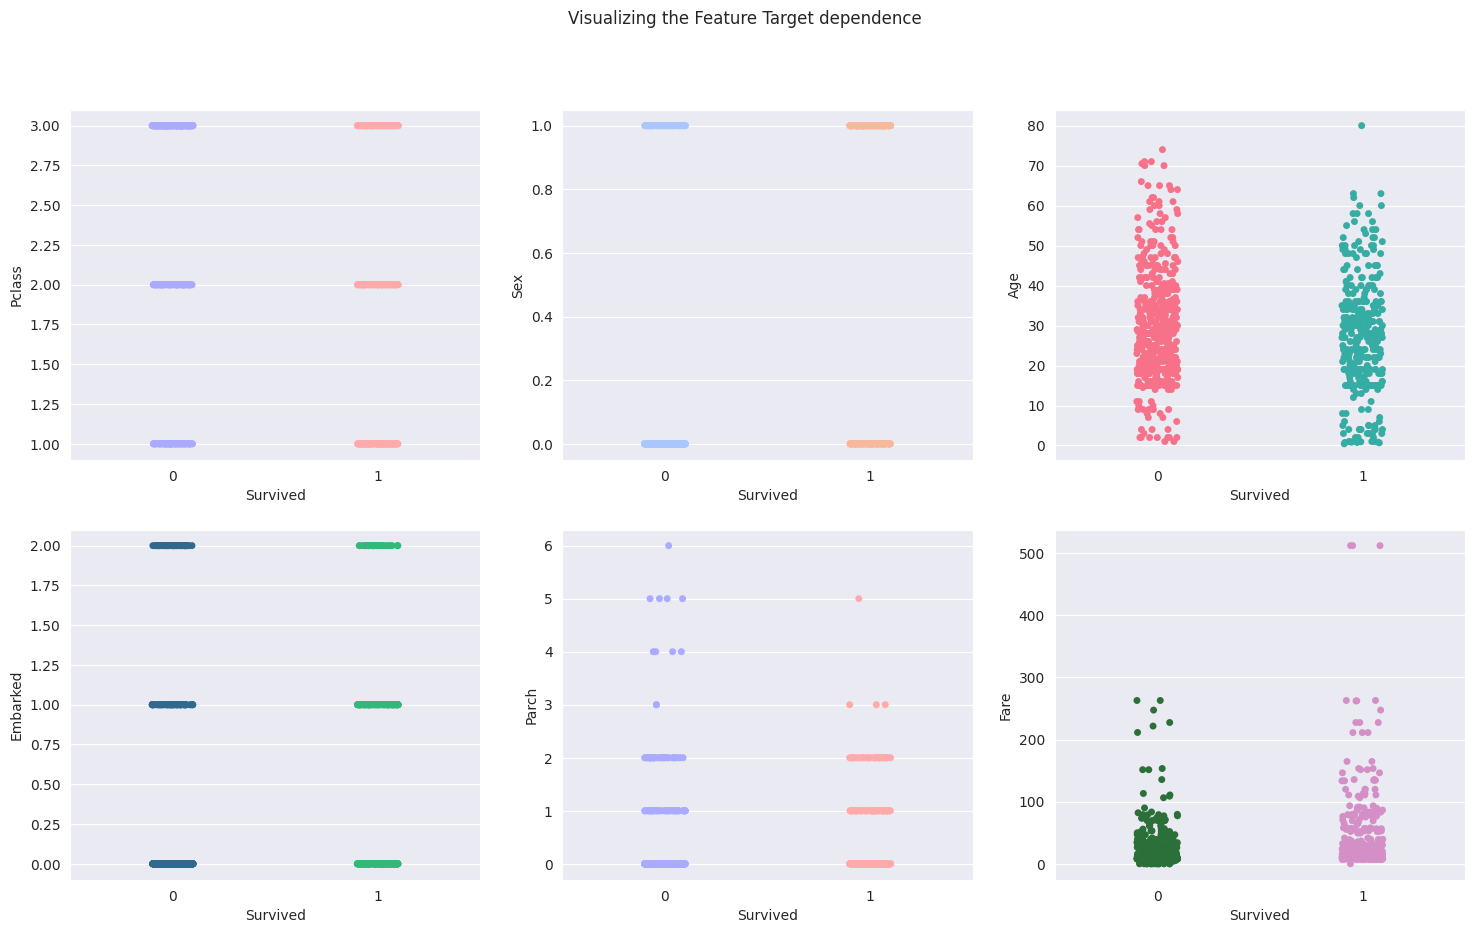

In [ ]:
#VISUALISING THE DATA
figure, axes = plt.subplots(2,3,figsize = (18,10))
# figure.delaxes(axes[1][2])
figure.suptitle('Visualizing the Feature Target dependence')
sns.stripplot(ax = axes[0,0],data = data, x='Survived',y='Pclass',palette='bwr')
sns.stripplot(ax = axes[0,1],data = data, x='Survived',y='Sex',palette='coolwarm')
sns.stripplot(ax = axes[0,2],data = data, x='Survived',y='Age',palette='husl')
sns.stripplot(ax = axes[1,0],data = data, x='Survived',y='Embarked',palette='viridis')
sns.stripplot(ax = axes[1,1],data = data, x='Survived',y='Parch',palette='bwr')
sns.stripplot(ax = axes[1,2],data = data, x='Survived',y='Fare',palette='cubehelix')
# sns.stripplot(ax = axes[0,0],data = data, x='Survived',y='Pclass',palette='bwr')

In [ ]:
#feature and target split
X = data.drop(columns = ["Survived"])
y = data["Survived"]

print("Features:", "\n", X[0:5])
print("Target:", "\n", y[0:5])

Features: 
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0
Target: 
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
#SPLITTING
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.22)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)
#check shape
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_val:", X_test.shape)
print("Shape of y_val:", y_test.shape)
# Calculate the percentage of data in each split
total_samples = len(X)
train_percentage = len(X_train) / total_samples * 100
val_percentage = len(X_val) / total_samples * 100
test_percentage = len(X_test) / total_samples * 100
print(f"Training set percentage: {train_percentage:.2f}%")
print(f"Validation set percentage: {val_percentage:.2f}%")
print(f"Test set percentage: {test_percentage:.2f}%")

Shape of X_train: (624, 7)
Shape of y_train: (624,)
Shape of X_test: (89, 7)
Shape of y_test: (89,)
Shape of X_val: (89, 7)
Shape of y_val: (89,)
Training set percentage: 70.19%
Validation set percentage: 19.80%
Test set percentage: 10.01%


##Task 2 </br>

In [ ]:
def calculate_entropy(y):
    unique_labels, label_counts = np.unique(y, return_counts=True)
    probabilities = label_counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(X, y, feature_name, threshold):
    total_entropy = calculate_entropy(y)
    # Split the dataset
    left_mask = X[feature_name] <= threshold
    right_mask = ~left_mask

    # Calculate entropy for each subset
    left_entropy = calculate_entropy(y[left_mask])
    right_entropy = calculate_entropy(y[right_mask])

    # Calculate information gain
    weighted_entropy = (len(y[left_mask]) / len(y)) * left_entropy + (len(y[right_mask]) / len(y)) * right_entropy
    information_gain = total_entropy - weighted_entropy

    return information_gain


def find_optimal_threshold(X, y, feature_name):
    # Sort unique values of the feature
    unique_values = np.unique(X[feature_name].values)

    # Initialize variables to track the best threshold and corresponding information gain
    best_threshold = None
    max_information_gain = -np.inf

    # Iterate through potential thresholds
    for threshold in unique_values:
        # Calculate information gain for the current threshold
        information_gain = calculate_information_gain(X, y, feature_name, threshold)

        # Update if the current threshold gives higher information gain
        if information_gain > max_information_gain:
            max_information_gain = information_gain
            best_threshold = threshold

    return best_threshold

# Example
feature_name = 'Age'

# Find the optimal threshold and corresponding information gain
optimal_threshold = find_optimal_threshold(X, y, feature_name)

print(f"Optimal Threshold for {feature_name}: {optimal_threshold}")

Optimal Threshold for Age: 15.0


##Task 3 <br>

In [ ]:
def conTocat(X,feature):
  optimal_threshold = find_optimal_threshold(X, y, feature_name)
  feature_values = X[feature]
  return [0 if value < optimal_threshold else 1 for value in feature_values]

# # example
conTocat(X,'Age')

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


##Task 4 <br/>

In [ ]:
def calculate_entropy(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    probabilities = class_counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = ~left_mask

    left_entropy = calculate_entropy(y[left_mask])
    right_entropy = calculate_entropy(y[right_mask])

    total_entropy = calculate_entropy(y)
    weighted_entropy = (len(y[left_mask]) / len(y)) * left_entropy + (len(y[right_mask]) / len(y)) * right_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain

def find_best_split(X, y):
    best_feature = None
    best_threshold = None
    best_information_gain = -1

    for feature in X.columns:
        unique_values = np.unique(X[feature])

        for threshold in unique_values:
            information_gain = calculate_information_gain(X, y, feature, threshold)

            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

def majority_class(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    majority_index = np.argmax(class_counts)
    return unique_classes[majority_index]

def build_tree(X, y, depth=0, max_depth=None):
    if depth == max_depth or len(np.unique(y)) == 1:
        return {'class': majority_class(y)}

    best_feature, best_threshold = find_best_split(X, y)

    if best_feature is None:
        return {'class': majority_class(y)}

    left_mask = X[best_feature] <= best_threshold
    right_mask = ~left_mask

    left_subtree = build_tree(X[left_mask], y[left_mask], depth + 1, max_depth)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth + 1, max_depth)

    return {
        'feature': best_feature,
        'threshold': best_threshold,
        'left': left_subtree,
        'right': right_subtree
    }

tree = build_tree(X_train,y_train,max_depth=3)
print(tree)
# def print_tree(node, depth=0, indent="  "):
#     if 'class' in node:
#         print(f"{indent * depth}Class: {node['class']}")
#     else:
#         print(f"{indent * depth}Feature: {node['feature']}, Threshold: {node['threshold']}")
#         print(f"{indent * depth}Less Than Threshold:")
#         print_tree(node['left'], depth + 1, indent)
#         print(f"{indent * depth}Greater Than Threshold:")
#         print_tree(node['right'], depth + 1, indent)

# # Example usage:
# # Assuming you already have a 'tree' built using the provided functions
# print_tree(tree)

{'feature': 'Sex', 'threshold': 0, 'left': {'feature': 'Age', 'threshold': 9.0, 'left': {'feature': 'SibSp', 'threshold': 2, 'left': {'class': 1}, 'right': {'class': 0}}, 'right': {'feature': 'Fare', 'threshold': 26.25, 'left': {'class': 0}, 'right': {'class': 0}}}, 'right': {'feature': 'Pclass', 'threshold': 2, 'left': {'feature': 'Fare', 'threshold': 28.7125, 'left': {'class': 1}, 'right': {'class': 1}}, 'right': {'feature': 'Fare', 'threshold': 24.15, 'left': {'class': 1}, 'right': {'class': 0}}}}


##Task 5 <br/>

In [ ]:
def infer(sample,tree):
  if 'feature' in tree:
    feature_value = sample.get(tree['feature'], 0)  # Get the feature value from the sample
    if feature_value <= int(tree['threshold']):
        # into the left subtree
        return infer(sample, tree['left'])
    else:
        # into the right subtree
        return infer(sample, tree['right'])
  else:
    # If the current node doesn't have a feature, it's a leaf node
    return tree['class']

# #example
# sample = {'Sex': 0, 'Pclass': 2, 'Age': 25, 'Fare': 30}
# prediction = infer(sample, tree)
# print("Predicted Class:", prediction)

##Task 6 <br/>

In [ ]:
def calculate_accuracy(true_labels, predicted_labels):
    correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
    total_samples = len(true_labels)
    accuracy = correct_predictions / total_samples
    return accuracy

def calculate_classwise_accuracy(true_labels, predicted_labels):
    classwise_accuracy = {}
    labels = set(true_labels)

    for label in labels:
        correct = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred == label)
        total = sum(1 for true in true_labels if true == label)
        classwise_accuracy[label] = correct / total if total > 0 else 0.0

    return classwise_accuracy

predictions_train = []
for index, sample in X_train.iterrows():
    # Use the infer function to predict the class for the current sample
    prediction = infer(sample.to_dict(), tree)
    # Append the prediction to the list of predictions
    predictions_train.append(prediction)
overall_accuracy_train = calculate_accuracy(y_train, predictions_train)

predictions_test = []
for index, sample in X_test.iterrows():
    # Use the infer function to predict the class for the current sample
    prediction = infer(sample.to_dict(), tree)
    # Append the prediction to the list of predictions
    predictions_test.append(prediction)
overall_accuracy_test = calculate_accuracy(y_test, predictions_test)

classwise_train_accuracy = calculate_classwise_accuracy(y_train, predictions_train)
classwise_test_accuracy = calculate_classwise_accuracy(y_test, predictions_test)

print("Overall Accuracy on Training Set:", overall_accuracy_train)
print("Classwise Accuracy on Training Set:", classwise_train_accuracy)
print("Overall Accuracy on Test Set:", overall_accuracy_test)
print("Classwise Accuracy on Test Set:", classwise_test_accuracy)

Overall Accuracy on Training Set: 0.8253205128205128
Classwise Accuracy on Training Set: {0: 0.884318766066838, 1: 0.7276595744680852}
Overall Accuracy on Test Set: 0.8314606741573034
Classwise Accuracy on Test Set: {0: 0.9038461538461539, 1: 0.7297297297297297}


##Task 7 <br/>

In [ ]:
def calculate_confusion_matrix(true_labels,predicted_labels):
  classwise = {}
  labels = set(true_labels)
  for l in labels:
    correct = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred == l)
    classwise[l] = correct
  true_negative = classwise[0]
  true_positive = classwise[1]
  nclasswise = {}
  labels = set(true_labels)
  for l in labels:
    wrong = sum(1 for true, pred in zip(true_labels, predicted_labels) if true != l and pred == l)
    nclasswise[l] = wrong
  false_positive = nclasswise[0]
  false_negative = nclasswise[1]
  confusion_matrix = np.array([[true_negative, false_positive],
                             [false_negative, true_positive]])
  return confusion_matrix

matrix = calculate_confusion_matrix(y_test, predictions_test)
print(matrix)

[[47 10]
 [ 5 27]]


##Task 8 <br/>

In [ ]:
def get(true_labels,predicted_labels):
  classwise = {}
  labels = set(true_labels)
  for l in labels:
    correct = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred == l)
    classwise[l] = correct
  true_negative = classwise[0]
  true_positive = classwise[1]
  nclasswise = {}
  labels = set(true_labels)
  for l in labels:
    wrong = sum(1 for true, pred in zip(true_labels, predicted_labels) if true != l and pred == l)
    nclasswise[l] = wrong
  false_positive = nclasswise[0]
  false_negative = nclasswise[1]
  return true_positive, true_negative, false_positive, false_negative

def calculate_precision(true_labels,predicted_labels):
  tp, tn, fp, fn = get(true_labels, predicted_labels)
  return ((tp)/(tp+fp))

def calculate_recall(true_labels,predicted_labels):
  tp, tn, fp, fn = get(true_labels, predicted_labels)
  return ((tp)/(tp+fn))

def calculate_f1(true_labels,predicted_labels):
  p = calculate_precision(true_labels,predicted_labels)
  r = calculate_recall(true_labels,predicted_labels)
  return ((2*p*r)/(p+r))

p = calculate_precision(y_test, predictions_test)
r = calculate_recall(y_test, predictions_test)
f1 = calculate_f1(y_test, predictions_test)
print("Precision of test data = ",p)
print("Recall of test data = ",r)
print("F1 score of test data = ",f1)

Precision of test data =  0.7297297297297297
Recall of test data =  0.84375
F1 score of test data =  0.7826086956521738


#Question 2 <br/>

##Task 1 <br>

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


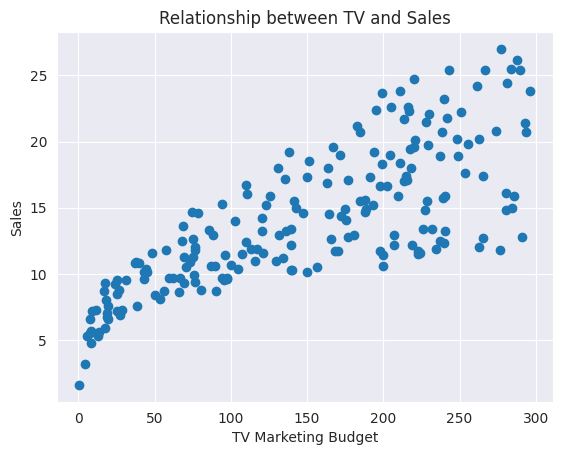

In [ ]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Relationship between TV and Sales')
plt.show()

In [ ]:
mean_tv = df['TV'].mean()
mean_sales = df['Sales'].mean()
sd_tv = df['TV'].std()
sd_sales = df['Sales'].std()
print('Mean of the TV Marketing Budget column = ',mean_tv)
print('Mean of the Sales column = ',mean_sales)
print('Standard Deviation of the TV Marketing Budget column = ',sd_tv)
print('Standard Deviation of the Sales column = ',sd_sales)

Mean of the TV Marketing Budget column =  147.0425
Mean of the Sales column =  14.0225
Standard Deviation of the TV Marketing Budget column =  85.85423631490808
Standard Deviation of the Sales column =  5.217456565710478


##Task 2 <br>

In [ ]:
print("Percentage of missing values:")
print(((df.isna().sum())/df.shape[0])*100)

Percentage of missing values:
TV       0.0
Sales    0.0
dtype: float64


No missing values in the data

In [ ]:
print('Before normalization - ')
print(df.head())

def normalize(x,m,sd):
  x = (x-m)/sd
  return x

df['TV'] = df['TV'].apply(lambda x: normalize(x, mean_tv, sd_tv))
df['Sales'] = df['Sales'].apply(lambda x: normalize(x, mean_sales, sd_sales))
print('After normalization - ')
print(df.head())

Before normalization - 
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
After normalization - 
         TV     Sales
0  0.967425  1.548168
1 -1.194379 -0.694304
2 -1.512360 -0.905135
3  0.051919  0.858177
4  0.393196 -0.215143


In [ ]:
## CHECKING THE NORMALIZATION USING STANDARD LIBERARY
from sklearn.preprocessing import StandardScaler
column_to_normalize = 'TV'
scaler = StandardScaler()
# Fit and transform the 'TV' column
df[column_to_normalize] = scaler.fit_transform(df[[column_to_normalize]])
# Display the normalized DataFrame
print(df.head())


         TV     Sales
0  0.969852  1.548168
1 -1.197376 -0.694304
2 -1.516155 -0.905135
3  0.052050  0.858177
4  0.394182 -0.215143


In [ ]:
X1 = df['TV']
y1 = df['Sales']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
print("Shape of X_train:", X1_train.shape)
print("Shape of y_train:", y1_train.shape)
print("Shape of X_test:", X1_test.shape)
print("Shape of y_test:", y1_test.shape)
# Calculate the percentage of data in each split
total_samples1 = len(X1)
train1_percentage = len(X1_train) / total_samples1 * 100
test1_percentage = len(X1_test) / total_samples1 * 100
print(f"Training set percentage: {train1_percentage:.2f}%")
print(f"Test set percentage: {test1_percentage:.2f}%")

Shape of X_train: (160,)
Shape of y_train: (160,)
Shape of X_test: (40,)
Shape of y_test: (40,)
Training set percentage: 80.00%
Test set percentage: 20.00%


##Task 3 <br>

In [ ]:
def hypo(x,w1,w0):
  hypo_fn = x*w1 + w0
  return hypo_fn

def cost_fn(X,y,w1,w0):
  n = len(X)
  h = hypo(X,w1,w0)
  sq_errors = (h-y)**2
  cost = (1/n)*(np.sum(sq_errors))
  return cost

def gradient_descent(X, y, w1, w0, learning_rate, epochs):
    m = len(X)

    for epoch in range(epochs):
        h = hypo(X, w1, w0)
        error = h - y

        # Update weights
        w1 -= learning_rate * (1 / m) * np.sum(error * X)
        w0 -= learning_rate * (1 / m) * np.sum(error)

    return w1, w0


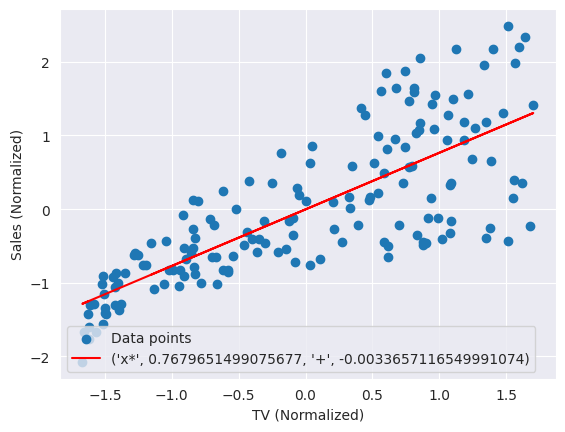

In [ ]:
# Initial weights
w1 = 0.0
w0 = 0.0

# Learning rate and epochs
learning_rate = 0.01
epochs = 1000

# Apply gradient descent
w1, w0 = gradient_descent(X1_train, y1_train, w1, w0, learning_rate, epochs)

# Scatter plot
plt.scatter(X1_train, y1_train, label='Data points')
line = y = 'x*',w1,'+',w0
plt.plot(X1_train, hypo(X1_train, w1, w0), color='red', label=line)
plt.xlabel('TV (Normalized)')
plt.ylabel('Sales (Normalized)')
plt.legend()
plt.show()

##Task 4 <br>

In [ ]:
def predict(X, w1, w0):
    return X * w1 + w0

# Make predictions on the test set
y_pred_test = predict(X1_test, w1, w0)

# Function to compute mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to compute absolute error
def absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Compute evaluation metrics
mse_test = mean_squared_error(y1_test, y_pred_test)
absolute_error_test = absolute_error(y1_test, y_pred_test)

# Display the results
print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'Absolute Error on Test Set: {absolute_error_test:}')

Mean Squared Error on Test Set: 0.3267283396635702
Absolute Error on Test Set: 0.4592108223054206


#Question 3 <br>

In [5]:
dataset = pd.read_csv("/gdrive/MyDrive/bostonHousingData.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


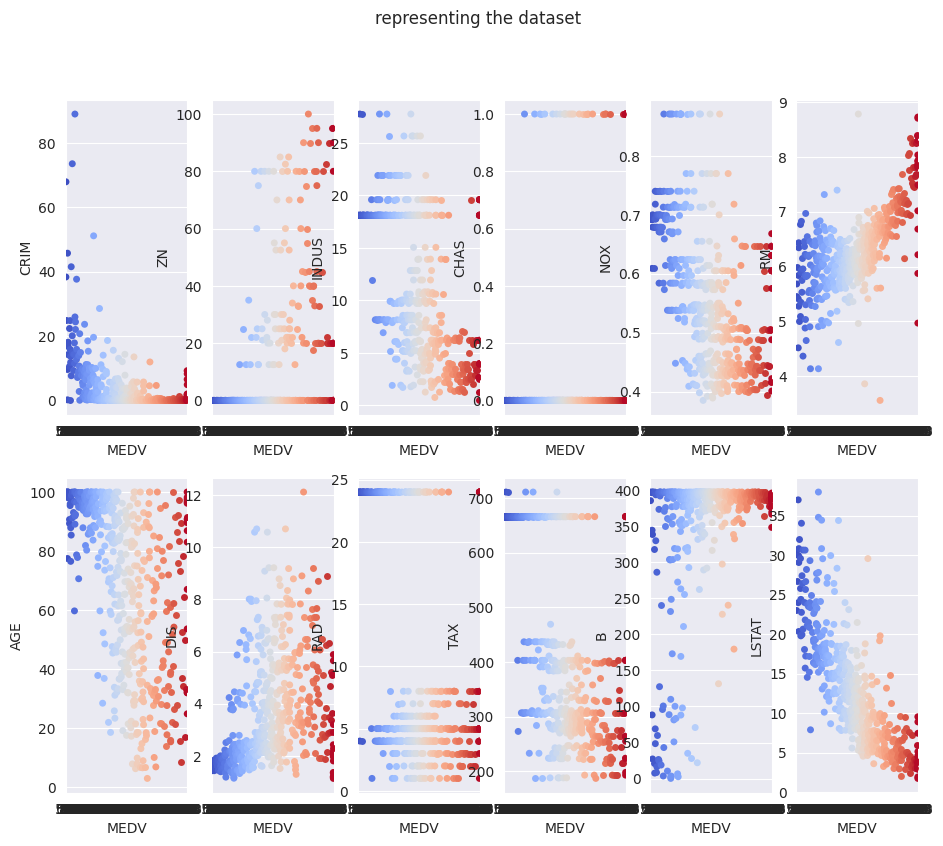

In [8]:
figure, axes = plt.subplots(2, 6, figsize = (11, 9))
figure.suptitle("representing the dataset")
# figure.delaxes(axes[1][1])

sns.stripplot(ax = axes[0, 0], data = dataset, x = "MEDV", y = "CRIM", palette = "coolwarm")
sns.stripplot(ax = axes[0, 1], data = dataset, x = "MEDV", y = "ZN", palette = "coolwarm")
sns.stripplot(ax = axes[0, 2], data = dataset, x = "MEDV", y = "INDUS", palette = "coolwarm")
sns.stripplot(ax = axes[0, 3], data = dataset, x = "MEDV", y = "CHAS", palette = "coolwarm")
sns.stripplot(ax = axes[0, 4], data = dataset, x = "MEDV", y = "NOX", palette = "coolwarm")
sns.stripplot(ax = axes[0, 5], data = dataset, x = "MEDV", y = "RM", palette = "coolwarm")
sns.stripplot(ax = axes[1, 0], data = dataset, x = "MEDV", y = "AGE", palette = "coolwarm")
sns.stripplot(ax = axes[1, 1], data = dataset, x = "MEDV", y = "DIS", palette = "coolwarm")
sns.stripplot(ax = axes[1, 2], data = dataset, x = "MEDV", y = "RAD", palette = "coolwarm")
sns.stripplot(ax = axes[1, 3], data = dataset, x = "MEDV", y = "TAX", palette = "coolwarm")
sns.stripplot(ax = axes[1, 4], data = dataset, x = "MEDV", y = "B", palette = "coolwarm")
sns.stripplot(ax = axes[1, 5], data = dataset, x = "MEDV", y = "LSTAT", palette = "coolwarm")

plt.show()


In [ ]:
statistics = dataset.describe()
# Display the mean and standard deviation
mean_std = statistics.loc[['mean', 'std']]
print(mean_std)

              CRIM            ZN         INDUS          CHAS           NOX  \
mean  2.924044e-17  2.193033e-17  1.315820e-16 -2.924044e-17 -2.527622e-16   
std   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                RM           AGE           DIS  RAD           TAX  \
mean -9.478584e-17 -3.655055e-17 -1.404235e-16  0.0  5.616939e-17   
std   1.000000e+00  1.000000e+00  1.000000e+00  1.0  1.000000e+00   

           PTRATIO             B         LSTAT          MEDV  
mean -4.212704e-16 -7.021173e-16 -1.169618e-16 -5.476515e-16  
std   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  


In [ ]:
print("Percentage of missing values:")
print(((dataset.isna().sum())/dataset.shape[0])*100)

Percentage of missing values:
CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64


In [ ]:
dataset.fillna(dataset.mean(),inplace = True)
print("Percentage of missing values:")
print(((dataset.isna().sum())/dataset.shape[0])*100)

Percentage of missing values:
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


In [ ]:
dataset.corr()['MEDV']

CRIM      -0.379695
ZN         0.365943
INDUS     -0.478657
CHAS       0.179882
NOX       -0.427321
RM         0.695360
AGE       -0.380223
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.721975
MEDV       1.000000
Name: MEDV, dtype: float64

In [ ]:
dataset = dataset.drop(['CRIM','ZN','CHAS','NOX','AGE','DIS','RAD','TAX','B'],axis =1)
dataset

,INDUS,RM,PTRATIO,LSTAT,MEDV
0,-1.283517,0.413263,-1.457558,-1.080991e+00,0.159528
1,-0.587193,0.194082,-0.302794,-4.996502e-01,-0.101424
2,-0.587193,1.281446,-0.302794,-1.213749e+00,1.322937
3,-1.302535,1.015298,0.112920,-1.366072e+00,1.181589
4,-1.302535,1.227362,0.112920,-1.169618e-16,1.486032
...,...,...,...,...,...
501,0.123760,0.438881,1.175303,-1.169618e-16,-0.014440
502,0.123760,-0.234316,1.175303,-5.080349e-01,-0.210154
503,0.123760,0.983986,1.175303,-9.887591e-01,0.148655
504,0.123760,0.724955,1.175303,-8.713729e-01,-0.057932


In [ ]:
print('Before normalization - ')
print(dataset.head())

def normalize(x,m,sd):
  x = (x-m)/sd
  return x

for column in dataset.columns:
  dataset[column] = dataset[column].apply(lambda x: normalize(x, dataset[column].mean(), dataset[column].std()))
print('After normalization - ')
print(dataset.head())

Before normalization - 
      INDUS        RM   PTRATIO         LSTAT      MEDV
0 -1.283517  0.413263 -1.457558 -1.080991e+00  0.159528
1 -0.587193  0.194082 -0.302794 -4.996502e-01 -0.101424
2 -0.587193  1.281446 -0.302794 -1.213749e+00  1.322937
3 -1.302535  1.015298  0.112920 -1.366072e+00  1.181589
4 -1.302535  1.227362  0.112920 -1.169618e-16  1.486032
After normalization - 
      INDUS        RM   PTRATIO         LSTAT      MEDV
0 -1.309714  0.413263 -1.457558 -1.103054e+00  0.159528
1 -0.599178  0.194082 -0.302794 -5.098482e-01 -0.101424
2 -0.599178  1.281446 -0.302794 -1.238522e+00  1.322937
3 -1.329120  1.015298  0.112920 -1.393954e+00  1.181589
4 -1.329120  1.227362  0.112920  9.611603e-18  1.486032


In [ ]:
X3 = dataset.drop(columns = ["MEDV"])
y3 = dataset['MEDV']

# Split the data into training and testing sets (80-20 split)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)
print("Shape of X_train:", X3_train.shape)
print("Shape of y_train:", y3_train.shape)
print("Shape of X_test:", X3_test.shape)
print("Shape of y_test:", y3_test.shape)
# Calculate the percentage of data in each split
total_samples2 = len(X3)
train2_percentage = len(X3_train) / total_samples2 * 100
test2_percentage = len(X3_test) / total_samples2 * 100
print(f"Training set percentage: {train2_percentage:.2f}%")
print(f"Test set percentage: {test2_percentage:.2f}%")

Shape of X_train: (404, 4)
Shape of y_train: (404,)
Shape of X_test: (102, 4)
Shape of y_test: (102,)
Training set percentage: 79.84%
Test set percentage: 20.16%


In [ ]:
def hypo(X,weights,w0):
  hypo = np.dot(X, weights) + w0
  return hypo

def cost_fn(X,y,weights,w0):
  n = len(X)
  h = hypo(X,weights,w0)
  sq_errors = (h-y)**2
  cost = (1/n)*(np.sum(sq_errors))
  return cost

def gradient_descent(X, y, learning_rate, epochs):
    X = X.values
    y = y.values
    m, n = X.shape
    weights = np.zeros(n)
    w0 = 0
    for epoch in range(epochs):
        h = hypo(X, weights, w0)
        error = h - y
        # Update weights
        for i in range(n):
            weights[i] -= learning_rate * (1 / m) * np.sum(error * X[:, i])
        w0 -= learning_rate * (1 / m) * np.sum(error)

    return weights, w0

In [ ]:
learning_rate = 0.01
epochs = 1000

weights, w0 = gradient_descent(X3_train,y3_train,learning_rate,epochs)
print(weights,w0)

[-0.0439341   0.35755881 -0.20438872 -0.42311455] -0.01448272198498869


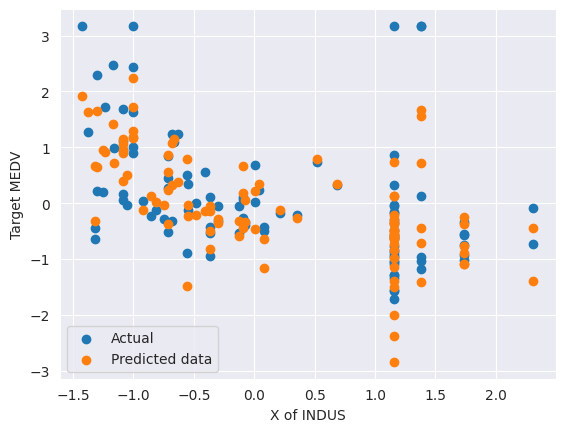

In [ ]:
def predict(x):
      y_pred=np.dot(x,weights)+w0
      return y_pred

result=predict(X3_test)

X_denormalised=X3_test*np.std(X3_test)+np.mean(X3_test)

Y_denormalised=y3_test* np.std(y3_test) + np.mean(y3_test)

y_pred_denormalised=result*np.std(result)+np.mean(result)

plt.scatter(X_denormalised.iloc[:,0], Y_denormalised, label = 'Actual')
plt.scatter(X_denormalised.iloc[:,0], result, label ='Predicted data')
plt.xlabel("X of INDUS")
plt.ylabel('Target MEDV')
plt.legend()
plt.show()

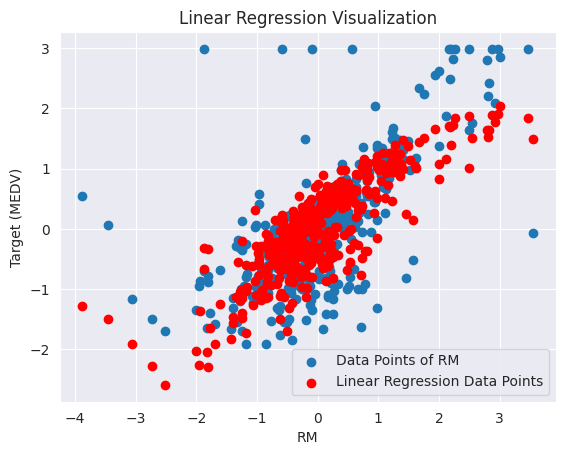

In [ ]:
def plot_regression_line(X, y, weights, w0):
    plt.scatter(X['RM'], y, label='Data Points of RM')
    plt.xlabel('RM')
    plt.ylabel('Target (MEDV)')

    # Create points for the regression line
    # x_line = np.linspace(min(X['RM']), max(X['RM']), 100)
    # x_line_reshaped = x_line.reshape(-1, 1)
    y_line = predict(X)

    # Plot the regression line
    plt.scatter(X['RM'], y_line, color='red', label='Linear Regression Data Points')

    plt.legend()
    plt.title('Linear Regression Visualization')
    plt.show()
plot_regression_line(X3_train,y3_train,weights,w0)

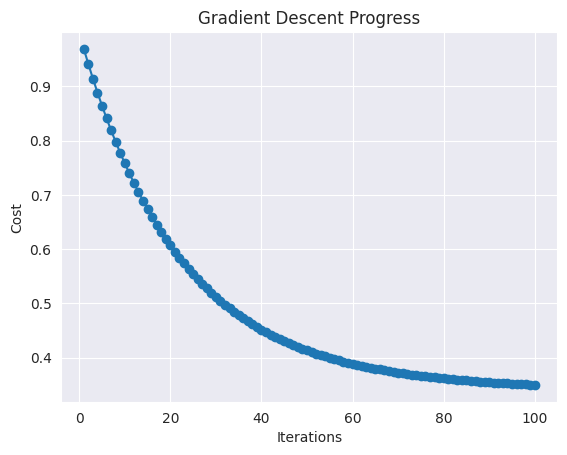

In [ ]:
import matplotlib.pyplot as plt

def plot_cost_convergence(costs):
    """
    Plots the convergence of the cost function over iterations.

    Parameters:
    - costs: List of cost values at each iteration.
    """
    plt.plot(range(1, len(costs) + 1), costs, marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Gradient Descent Progress')
    plt.show()

def gradient_descent(X, y, learning_rate, epochs):
    X = X.values
    y = y.values
    m, n = X.shape
    weights = np.zeros(n)
    w0 = 0
    costs = []  # To store the cost at each iteration

    for epoch in range(epochs):
        h = hypo(X, weights, w0)
        error = h - y
        # Update weights
        for i in range(n):
            weights[i] -= learning_rate * (1 / m) * np.sum(error * X[:, i])
        w0 -= learning_rate * (1 / m) * np.sum(error)

        # Calculate and store the cost at each iteration
        cost = cost_fn(X, y, weights, w0)
        costs.append(cost)

    # Plotting the cost over iterations using the separate function
    plot_cost_convergence(costs)

    return weights, w0

optimized_weights, optimized_w0 = gradient_descent(X3, y3, learning_rate=0.01, epochs=100)


In [ ]:
# Make predictions on the test set
y3_pred = hypo(X3_test, weights, w0)

mse = mean_squared_error(y3_test, y3_pred)
mae = mean_absolute_error(y3_test, y3_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(f'Absolute Error on Test Set: {mae}')

Mean Squared Error on Test Set: 0.3514553115417739
Absolute Error on Test Set: 0.4256213647891338
